In [ ]:
# Import the regular libraries. 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import spatial
import statsmodels.api as sm 

# Import the k nearest neighbor libraries. 
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.patches as mpatches 
from sklearn import neighbors, datasets
from sklearn.model_selection import cross_val_score, train_test_split 
%matplotlib inline 

# Import the analysis libraries. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import classification_report 

# Import the naive bayes libraries. 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score 
amazon = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/amazon_toy_sample_clean.csv", encoding="ISO-8859-1")# USE YOUR OWN GITHUB LINK HERE
amazon.dropna(inplace=True)
amazon.tail(5) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,uniq_id,product_name,manufacturer,price,number_available_in_stock,status,number_of_reviews,number_of_answered_questions,average_review_rating_of_5,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews
6331,8020c8cd2b86bd2e793241dd321d8921,Parrot Bebop Drone 2 (White),Parrot,439.95,11,new,9,3,3.3,Hobbies > Remote Controlled Devices > Helicopt...,http://www.amazon.co.uk/BTG-Upgrade-Battery310...,Colour Name:White and Black Product Descriptio...,Technical Details Item Weight503 g Product Dim...,Colour Name:White and Black Product Descriptio...,Not available,Can you use the skycontroller from the origina...,Much improved but slightly weird incremental u...
6332,ddd1807f90417adcdf4cd45841239e01,Star Images E.T. Stunt Puppet Replica Action F...,Star images,447.99,3,new,1,3,5.0,Figures & Playsets > Accessories,http://www.amazon.co.uk/12-Inch-Replica-Stunt-...,Product Description E.T. Stunt Puppet Replica ...,Technical Details Item Weight998 g Product Dim...,Product Description E.T. Stunt Puppet Replica ...,http://www.amazon.co.uk/12-Inch-Replica-Stunt-...,Is this made by Neca and is it the 3 foot life...,Five Stars // 5.0 // 25 Oct. 2014 // By\n \...
6333,1e897bf37e4e89aba7cc962f24913fd4,Indiana Jones - 12 Inch Action Figures: Indian...,Sideshow,719.95,2,new,1,1,5.0,Figures & Playsets > Science Fiction & Fantasy,http://www.amazon.co.uk/Indiana-Jones-Masterpi...,Figurine articulÃ©e taille env. 30 cm avec vÃª...,Technical Details Item Weight1.1 Kg Product Di...,Figurine articulÃ©e taille env. 30 cm avec vÃª...,Not available,None,"""It's not the years, sweet heart, it's the mil..."
6334,4f705c302bdcf5d2b0c1df973d98f99f,DJI Phantom 2 with H3-3D Gimbal,DJI,995.11,2,used,4,19,5.0,Hobbies > Remote Controlled Devices > Helicopt...,http://www.amazon.co.uk/Propellers | http://ww...,Product Description Including the H3-3D Gimbal...,Technical Details Item Weight2.5 Kg Product Di...,Product Description Including the H3-3D Gimbal...,Not available,Does this come with the gimbal already install...,Dji // 5.0 // 24 Aug. 2014 // By\n \n ol...
6335,75d96583894e50412ba5c0161375fef5,Bowen Designs - Marvel Statue Thor Classic Act...,Bowen Designs,2439.92,2,new,1,1,4.0,Hobbies > Model Trains & Railway Sets > Access...,http://www.amazon.co.uk/Kotobukiya | http://ww...,Sideshow Collectibles is proud to present the ...,Technical Details Item Weight6 Kg Product Dime...,Sideshow Collectibles is proud to present the ...,Not available,None,Thortastic... // 4.0 // 12 Sept. 2012 // By\n ...


In [ ]:
bins = np.linspace(amazon.average_review_rating_of_5.min(),amazon.average_review_rating_of_5.max(),4)
bins

array([0.        , 1.66666667, 3.33333333, 5.        ])

In [ ]:
labels = ['low', 'medium', 'high']

In [ ]:
amazon2=amazon
amazon2['bins'] = pd.cut(amazon2['average_review_rating_of_5'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
amazon2.groupby(['bins']).count()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,status,number_of_reviews,number_of_answered_questions,average_review_rating_of_5,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews
bins,,,,,,,,,,,,,,,,,
low,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
medium,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
high,6294,6294,6294,6294,6294,6294,6294,6294,6294,6294,6294,6294,6294,6294,6294,6294,6294


In [ ]:
amazon3 = pd.DataFrame(amazon, columns = ['price', 'number_available_in_stock', 'number_of_reviews','number_of_answered_questions','bins'])
amazon3.head()

,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,bins
0,0.29,3,3,2,high
1,0.38,2,2,1,high
2,0.39,7,2,1,high
4,0.60,7,21,1,high
5,0.64,6,10,2,high


In [ ]:
amazon3.bins.unique()

['high', 'medium', 'low']
Categories (3, object): ['low' < 'medium' < 'high']

In [ ]:
pip install pandas-profiling # installing the current GA version

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
x=amazon3.iloc[:,:3] # all parameters
y=amazon3['bins']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

# So, what training data do we have?
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (4734, 3)
y_train shape: (4734,)


In [ ]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (1578, 3)
y_test shape: (1578,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors = 1)
model1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = model1.predict(X_test)
print("Test set predictions: \n {}".format(y_pred))

Test set predictions: 
 ['high' 'high' 'high' ... 'high' 'high' 'high']


In [ ]:
# Accuracy score
print("Test set score: {:.2f}".format(model1.score(X_test, y_test)))

Test set score: 1.00


In [ ]:
navie_bayes_model = pd.DataFrame(y_pred,y_test)
navie_bayes_model = pd.DataFrame({'predicted':y_pred,'original':y_test})
navie_bayes_model.head()

,predicted,original
5346,high,high
3736,high,high
4401,high,high
3488,high,high
4375,high,high


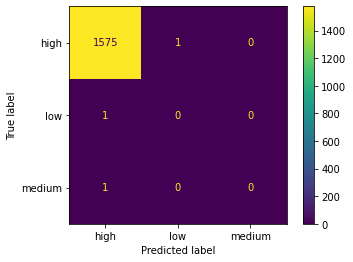

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model1.classes_)
cm_display = ConfusionMatrixDisplay(cm, display_labels=model1.classes_).plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=['high', 'medium', 'low']))

              precision    recall  f1-score   support

        high       1.00      1.00      1.00      1576
      medium       0.00      0.00      0.00         1
         low       0.00      0.00      0.00         1

    accuracy                           1.00      1578
   macro avg       0.33      0.33      0.33      1578
weighted avg       1.00      1.00      1.00      1578



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# To determine how to pick k, we are first creating a list of potential k values
klist = list(range(1,50,2)) # Our list goes from 1 to 50 in increments of 2

# Then we create an empty list that will hold cross-validation scores
cv_scores = []

In [ ]:
for k in klist:
    model10 = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model10, x, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Changing to misclassification error
errors = 1- np.array(cv_scores)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_se

The optimal number of neighbors is 5


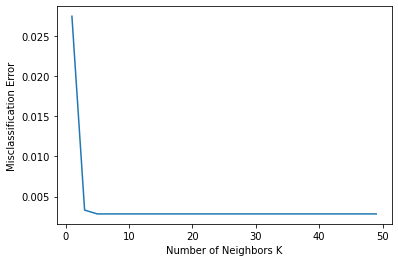

In [ ]:
optimal_k = klist[np.argmin(errors)]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(klist, errors)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
model5 = neighbors.KNeighborsClassifier(n_neighbors=10)

model5.fit(X_train, y_train)

y_pred = model5.predict(X_test)

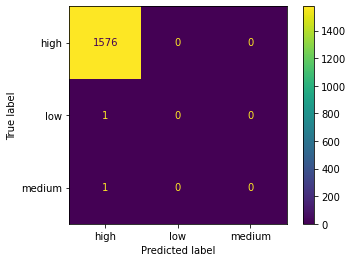

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=model5.classes_)
cm_display = ConfusionMatrixDisplay(cm, display_labels=model5.classes_).plot()

In [ ]:
print(classification_report(y_test, y_pred, labels=['high', 'medium', 'low']))

              precision    recall  f1-score   support

        high       1.00      1.00      1.00      1576
      medium       0.00      0.00      0.00         1
         low       0.00      0.00      0.00         1

    accuracy                           1.00      1578
   macro avg       0.33      0.33      0.33      1578
weighted avg       1.00      1.00      1.00      1578



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
ins_train, ins_test = train_test_split(amazon3, test_size = 0.2)
print(ins_train)
print(ins_test)

      price  number_available_in_stock  number_of_reviews  \
6163  90.30                         17                  1   
829    2.99                          6                  7   
5003  23.95                          6                  4   
6058  66.64                          1                  1   
3381  12.00                          6                  1   
...     ...                        ...                ...   
5552  34.99                          2                  1   
6023  61.01                         13                 19   
3693  13.60                          3                  8   
110    1.29                         11                 37   
3076  10.99                          2                  3   

      number_of_answered_questions  bins  
6163                             2  high  
829                              1  high  
5003                             3  high  
6058                             2  high  
3381                             1  high  
...      

In [ ]:
ins_train_np = np.array([ins_train])
ins_test_np = np.array([ins_test])

In [ ]:
ins_naivebayes = GaussianNB()


In [ ]:
ins_naivebayes.fit(ins_train.drop('bins',axis=1), ins_train['bins'])

GaussianNB()

In [ ]:
ins_predictions = ins_naivebayes.predict(ins_test.drop('bins',axis=1))
accuracy_score(ins_test['bins'], ins_predictions)

0.9881235154394299

In [ ]:
ins_predictions

array(['high', 'high', 'high', ..., 'high', 'high', 'high'], dtype='<U6')

In [ ]:
realvsmodel2 = pd.DataFrame(ins_predictions,ins_test)
realvsmodel2 = pd.DataFrame({'predicted':ins_predictions,'original':ins_test['bins']})
realvsmodel2.head()

,predicted,original
697,high,high
486,high,high
5849,high,high
475,high,high
343,high,high


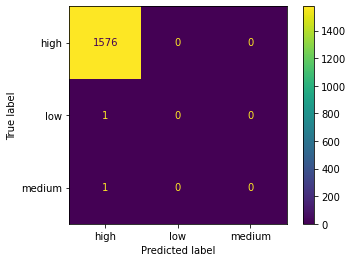

In [ ]:
model6 = neighbors.KNeighborsClassifier(n_neighbors=10)

model6.fit(X_train, y_train)

y_pred = model6.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model6.classes_)
cm_display = ConfusionMatrixDisplay(cm, display_labels=model6.classes_).plot()


In [ ]:
print(classification_report(y_test, y_pred, labels=['high', 'medium', 'low']))

              precision    recall  f1-score   support

        high       1.00      1.00      1.00      1576
      medium       0.00      0.00      0.00         1
         low       0.00      0.00      0.00         1

    accuracy                           1.00      1578
   macro avg       0.33      0.33      0.33      1578
weighted avg       1.00      1.00      1.00      1578



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
